**Name of data set:** IDOR FY 2011 lottery sales (by postal code)

**Source:** Illinois State Taxation Bureau of data.illinois.gov.

**The URL:** https://data.illinois.gov/dataset/326idor_fy_2011_lottery_sales_by_zip_code

**License:** The data of such public government portals are usually available to the public.

**Size of data set:**

**File Size:** The data set is about 14.7 KB (14,710 bytes).

**Number of items (rows):** There are 959 items in the dataset.

The data set described in the notebook is called "IDOR FY 2011 Lottery Sales (by Postal Code)", which is from the Illinois State Taxation Bureau of data.illinois.gov. It includes lottery sales data in fiscal year 2011, classified by postal code. You can access the dataset online through the provided URL.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import json
import re
import random
from functools import reduce
from ast import literal_eval

In [2]:
df = pd.read_csv('/content/IDOR_FY_2011_Lottery_Sales_by_Zip_Code.csv')
df[:100]

,sales_amount,zip_code
0,26805228.0,60619
1,20964145.5,60628
2,20036299.5,60651
3,19844371.5,60639
4,19333370.0,60634
...,...,...
95,6389625.0,60060
96,6365861.5,60656
97,6337912.0,60176
98,6274749.0,60659


In [3]:
df['zip_code'] = df['zip_code'].apply(lambda x: re.sub(r'[^0-9]', '', str(x)))
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')
df.dropna(subset=['zip_code'], inplace=True)
df['zip_code'] = df['zip_code'].astype(int)
df['normalized_sales'] = (df['sales_amount'] - df['sales_amount'].min()) / (df['sales_amount'].max() - df['sales_amount'].min())

(60000.0, 65000.0)

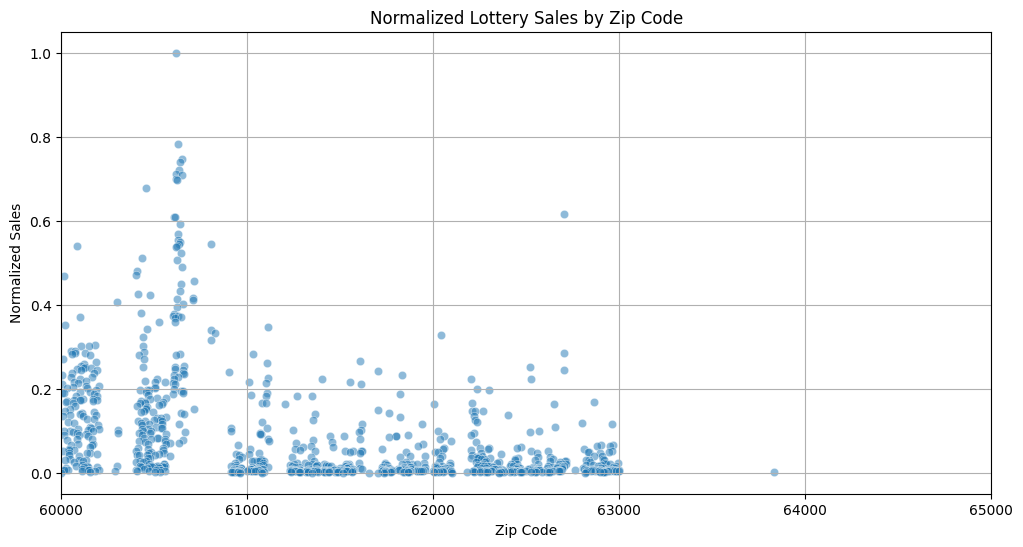

In [4]:
#Chart 1： Scatter plot Distribution
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='zip_code', y='normalized_sales', alpha=0.5)
plt.title('Normalized Lottery Sales by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Normalized Sales')
plt.grid(True)
plt.xlim(60000, 65000)

In the above plot, I want to make a scatter plot analysis of lottery sales by postal code, so that I can know which area people spend more money on lottery tickets.

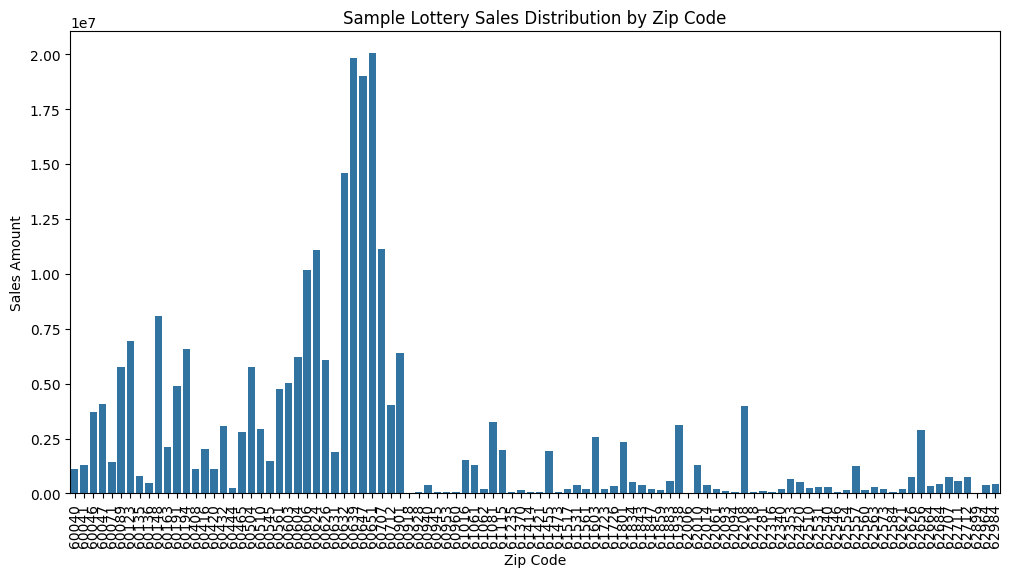

In [5]:
#Chart 2： Bar Plot Distribution
sample_data = df.sample(n=100, random_state=1)
plt.figure(figsize=(12, 6))
sns.barplot(x=sample_data['zip_code'], y=sample_data['sales_amount'])
plt.xticks(rotation=90)
plt.title('Sample Lottery Sales Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Sales Amount')
plt.show()

Similarly, in the above plot, I want to analyze the lottery sales by postal code, which can make the previous graph more intuitive.

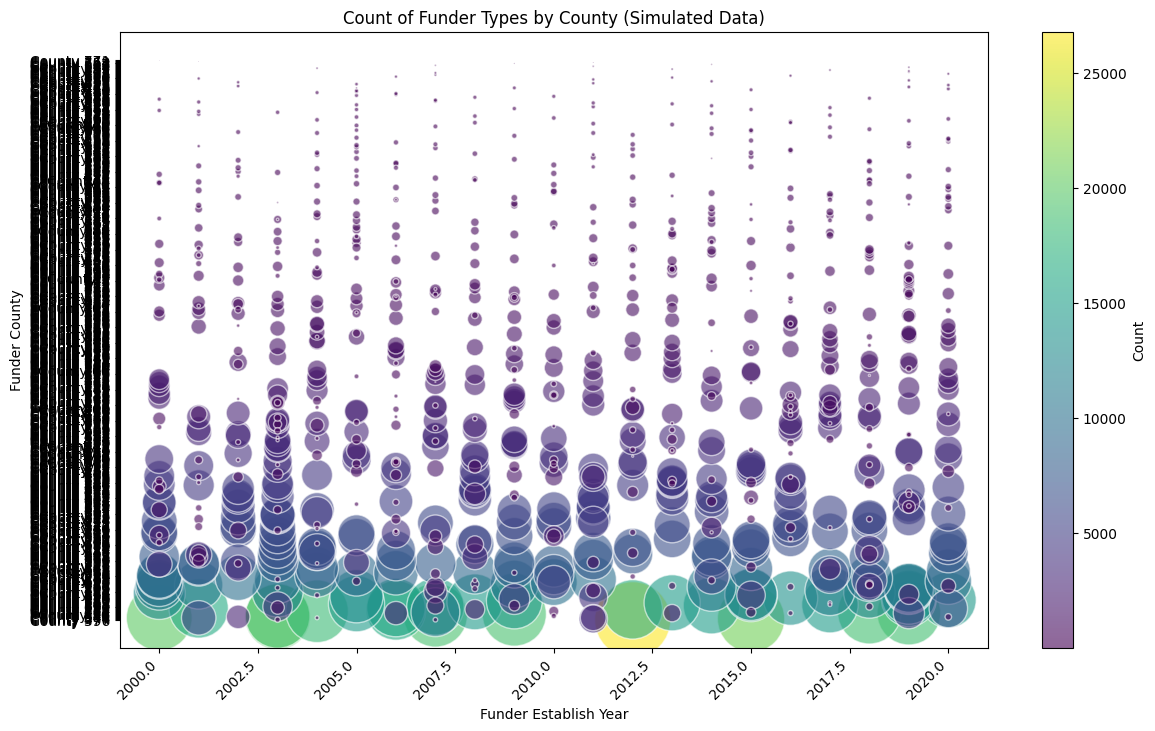

In [6]:
#Chart 3： A scatter plot based on the Sales Amount, with the size and color of the dots as the background: Sponsor county or Region and Year of Establishment
np.random.seed(0)
df['Funder Establish Year'] = np.random.choice(range(2000, 2021), size=len(df))

unique_zip_codes = df['zip_code'].unique()
counties = [f'County {i+1}' for i in range(len(unique_zip_codes))]
zip_to_county = dict(zip(unique_zip_codes, np.random.choice(counties, size=len(unique_zip_codes))))
df['Funder County'] = df['zip_code'].map(zip_to_county)

df['count'] = df['sales_amount'] / 1000

size_scaler = Normalize(vmin=df['count'].min(), vmax=df['count'].max())

fig, ax = plt.subplots(figsize=(14, 8))
scatter = ax.scatter(df['Funder Establish Year'], df['Funder County'],
                     s=size_scaler(df['count'])*3000,
                     c=df['count'], cmap='viridis', alpha=0.6, edgecolors='w')

cbar = plt.colorbar(scatter)
cbar.set_label('Count')

ax.set_xlabel('Funder Establish Year')
ax.set_ylabel('Funder County')
ax.set_title('Count of Funder Types by County (Simulated Data)')

plt.xticks(rotation=45, ha='right')
plt.show()